# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [67]:
import common

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

Populating the interactive namespace from numpy and matplotlib


## Вспомогательные функции

In [68]:
def normalize_part_df(df, t_stag):
    return df / df.iloc[(df.t-t_stag).abs().argsort()[:1]].max()

## Постоянные

In [69]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Общее

### Ниже представлено сравнение характеристик установок на режимах частичной мощности. Условия сравнения следующие: 
1. Степень повышения давления компрессоров выбиралась из условия максимального КПД на номинальном режиме работы.
2. Температура основной камеры сгорания: 1450 К.
3. Номинальная мощность 16 МВт
4. Для трехвальных схем характеристика на номинальном режиме строится при одинаковых степенях повышения давления в обоих компрессорах

## Двухвальная установка без регенератора

### Загрузка данных

In [70]:
d2n = pd.read_json(data_root + '2n.json').sort_values('t')
d2ns = pd.read_json(data_root + '2n_simple.json')

### Выведем параметры установки в точке максимального КПД

In [71]:
common.get_2_shaft_nominal_parameters_note(
    d2ns[d2ns.efficiency == d2ns.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [72]:
common.get_2_shaft_nominal_parameters_note(
    d2ns[d2ns.specific_power == d2ns.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

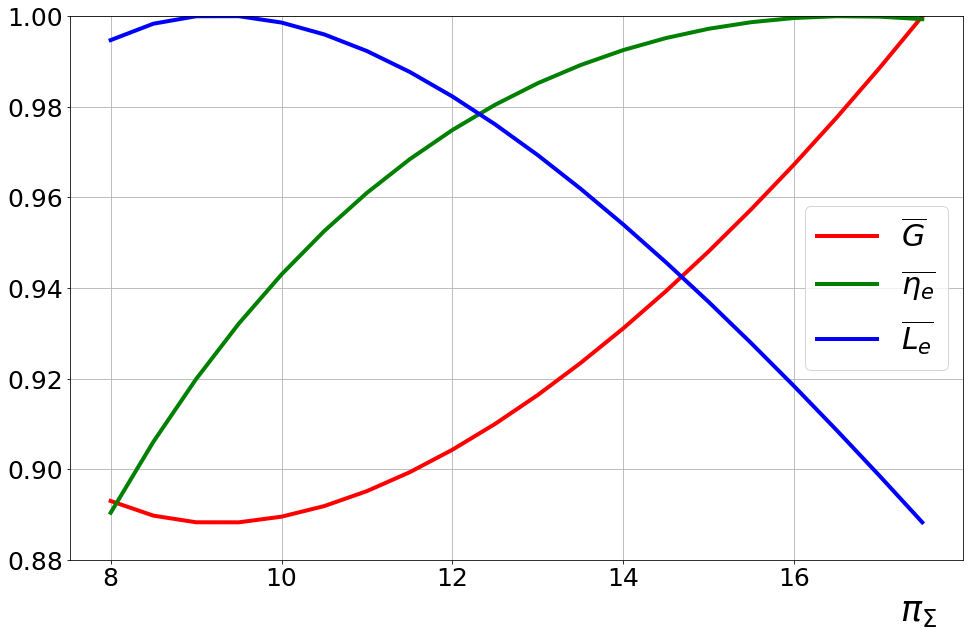

In [73]:
common.plot_nom_characteristic(d2ns, ymin=0.88, ymax=1)
plt.show()

### Построим характеристику установки на режимах частичной мощности

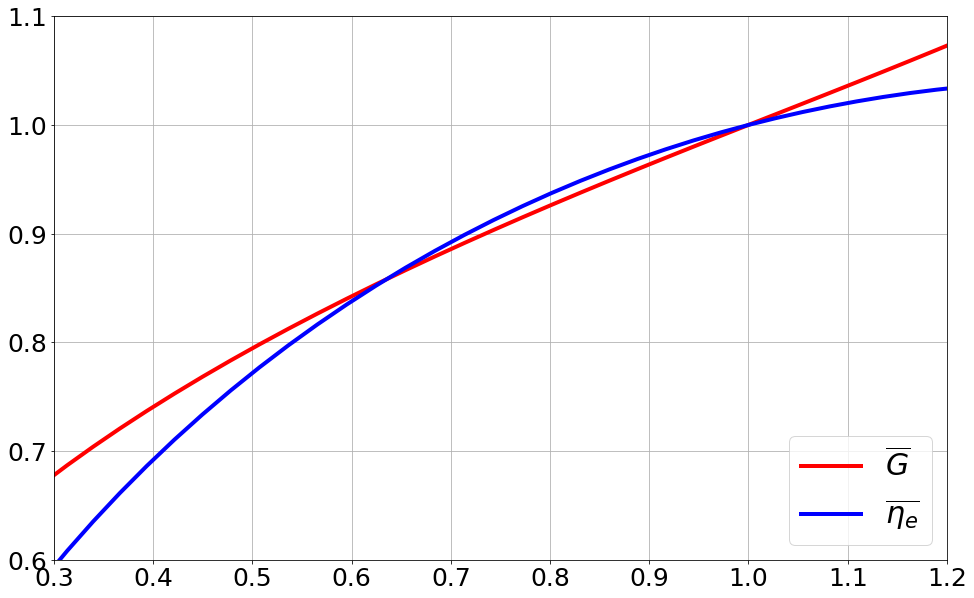

In [74]:
common.plot_common_characteristics(normalize_part_df(d2n, 1450), ymin=0.6, ymax=1.1)
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [75]:
d2nr = pd.read_json(data_root + '2nr.json').sort_values('t')
d2nrs = pd.read_json(data_root + '2nr_simple.json')

### Выведем параметры установки в точке максимального КПД

In [76]:
common.get_2_shaft_nominal_parameters_note(
    d2nrs[d2nrs.efficiency == d2nrs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [77]:
common.get_2_shaft_nominal_parameters_note(
    d2nrs[d2nrs.specific_power == d2nrs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

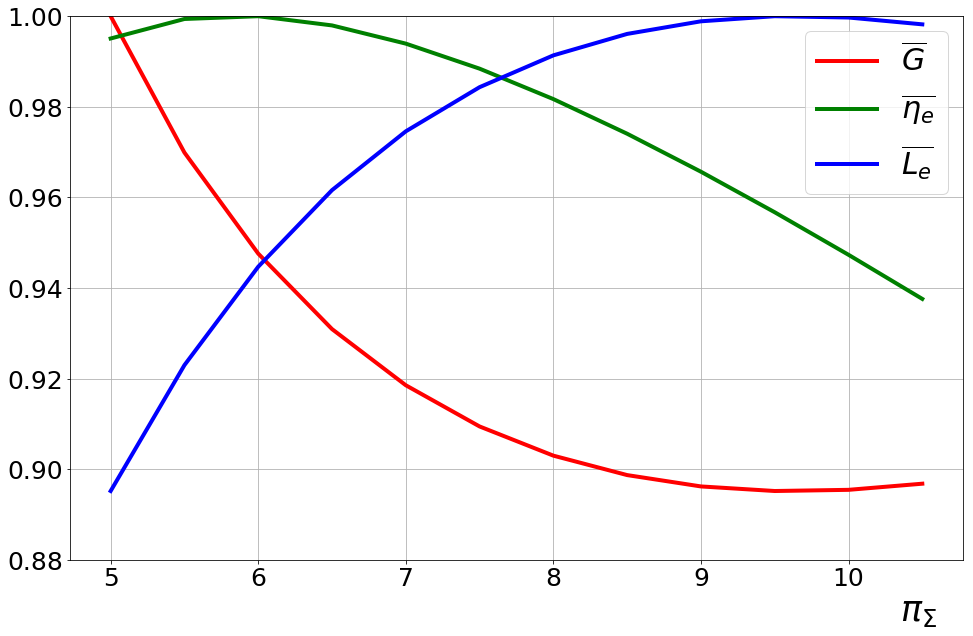

In [78]:
common.plot_nom_characteristic(d2nrs, ymin=0.88, ymax=1)
plt.show()

### Построим характеристику установки на режимах частичной мощности

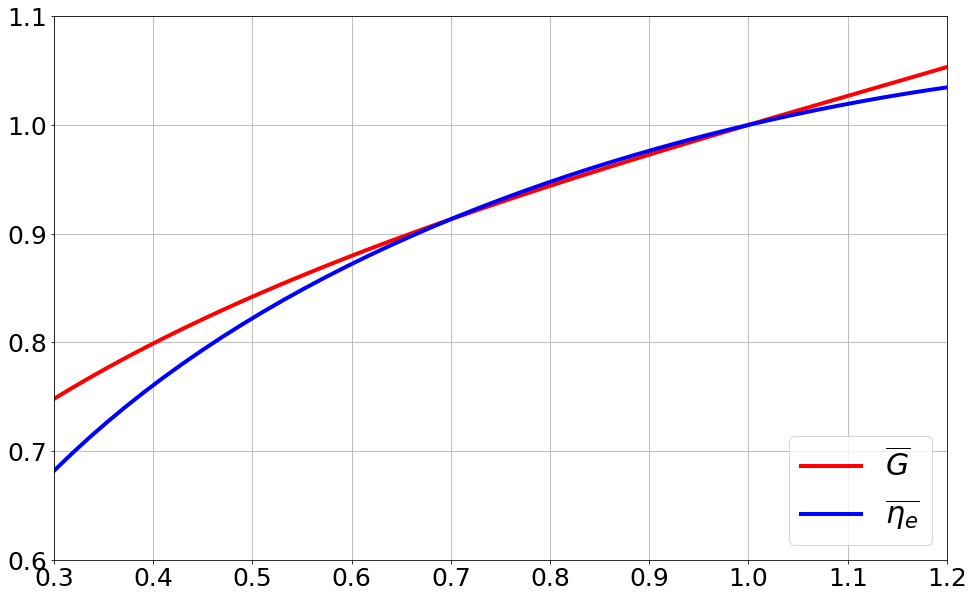

In [79]:
common.plot_common_characteristics(normalize_part_df(d2nr, 1450), ymin=0.6, ymax=1.1)
plt.show()

## Трехвальная установка без пром. охлаждения и пром. подогрева

### Загрузка данных

In [80]:
d3n = pd.read_json(data_root + '3n.json').sort_values('t')
d3ns = pd.read_json(data_root + '3n_simple.json')
d3ns = d3ns[d3ns.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [81]:
common.get_3_shaft_nominal_parameters_note(
    d3ns[d3ns.efficiency == d3ns.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [82]:
common.get_3_shaft_nominal_parameters_note(
    d3ns[d3ns.specific_power == d3ns.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

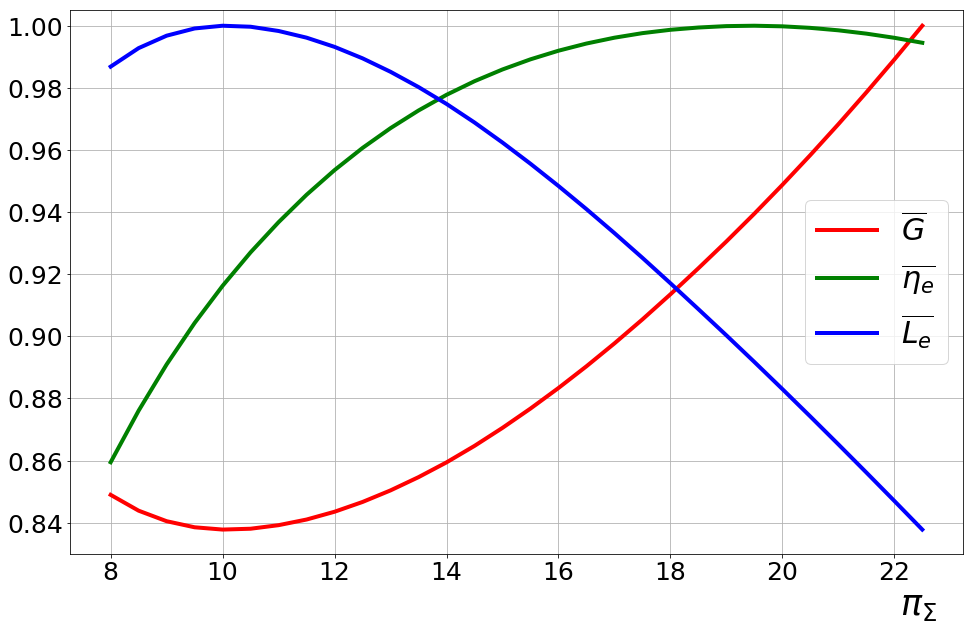

In [83]:
common.plot_nom_characteristic(d3ns)
plt.show()

### Построим характеристику установки на режимах частичной мощности

In [101]:
d3n

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
19,0.190337,0.960001,1.0,0.999945,39.129979,1.923007,3.838186,2.985915,4.207847,1929.504100,5455.482859,4960.598181,1170
18,0.204993,0.967611,1.0,0.999972,40.718193,2.001858,3.871080,3.107883,4.840527,2021.938455,5498.249391,5051.495028,1190
17,0.219527,0.974413,1.0,0.999987,42.327010,2.083612,3.906127,3.229496,5.529621,2113.882687,5540.951502,5139.976933,1210
16,0.233667,0.980322,1.0,0.999994,43.931580,2.167431,3.942693,3.349237,6.267581,2204.255562,5582.931695,5225.480871,1230
15,0.247301,0.985342,1.0,0.999998,45.524301,2.253128,3.980829,3.466373,7.050695,2292.730079,5624.218927,5308.165307,1250
14,0.260305,0.989496,1.0,0.999999,47.097332,2.340455,4.020511,3.580230,7.873970,2378.964946,5664.821841,5388.148052,1270
13,0.272546,0.992817,1.0,1.000000,48.638224,2.428893,4.061415,3.690073,8.729280,2462.435549,5704.554078,5465.310525,1290
12,0.283886,0.995363,1.0,1.000000,50.133720,2.517792,4.103020,3.795332,9.606690,2542.607608,5743.148170,5539.441253,1310
11,0.294355,0.997237,1.0,1.000000,51.593149,2.607485,4.145835,3.896224,10.504946,2619.807857,5781.159919,5611.215559,1330
10,0.303908,0.998528,1.0,1.000000,53.013322,2.697674,4.189654,3.992675,11.417171,2693.860079,5818.615323,5680.741795,1350


In [84]:
help(normalize_part_df)

Help on function normalize_part_df in module __main__:

normalize_part_df(df, t_stag)



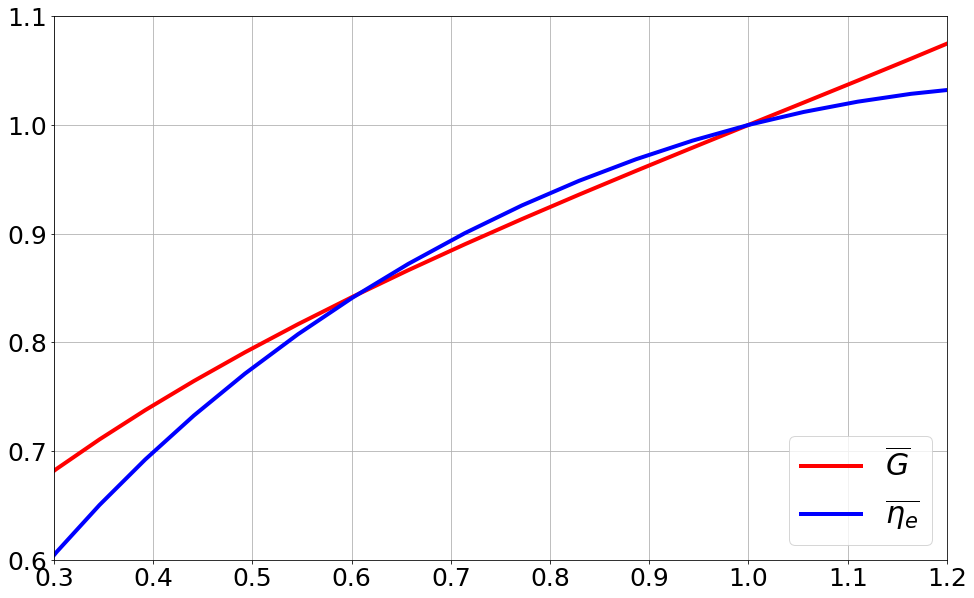

In [85]:
common.plot_common_characteristics(normalize_part_df(d3n, 1450), ymin=0.6, ymax=1.1)
plt.show()

## Трехвальная установка с пром. подогревом

### Загрузка данных

In [86]:
d3nb = pd.read_json(data_root + '3nb.json').sort_values('t')
d3nbs = pd.read_json(data_root + '3nb_simple.json')
d3nbs = d3nbs[d3nbs.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [87]:
common.get_3_shaft_nominal_parameters_note(
    d3nbs[d3nbs.efficiency == d3nbs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [88]:
common.get_3_shaft_nominal_parameters_note(
    d3nbs[d3nbs.specific_power == d3nbs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

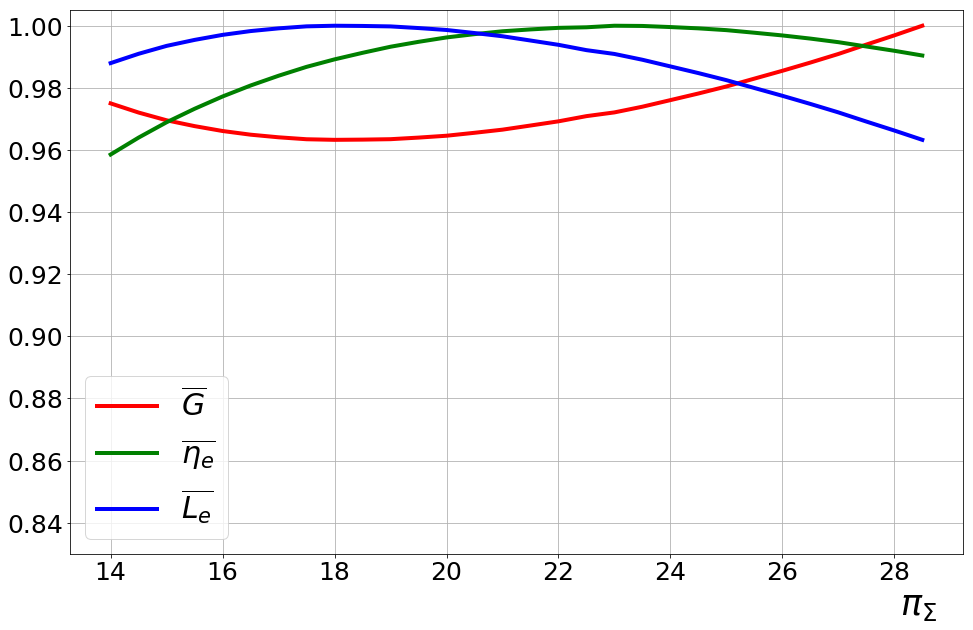

In [89]:
common.plot_nom_characteristic(d3nbs)
plt.show()

### Построим характеристику установки на режимах частичной мощности

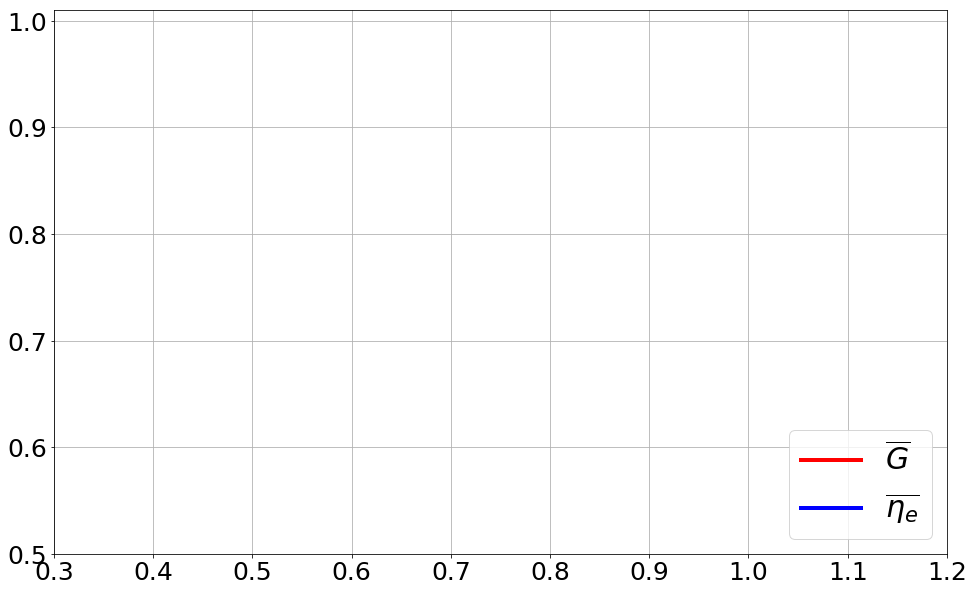

In [90]:
common.plot_common_characteristics(d3nb)
plt.show()

## Трехвальная установка с пром. охлаждением

### Загрузка данных

In [91]:
d3nc = pd.read_json(data_root + '3nc.json').sort_values('t')
d3ncs = pd.read_json(data_root + '3nc_simple.json')
d3ncs = d3ncs[d3ncs.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [92]:
common.get_3_shaft_nominal_parameters_note(
    d3ncs[d3ncs.efficiency == d3ncs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [93]:
common.get_3_shaft_nominal_parameters_note(
    d3ncs[d3ncs.specific_power == d3ncs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

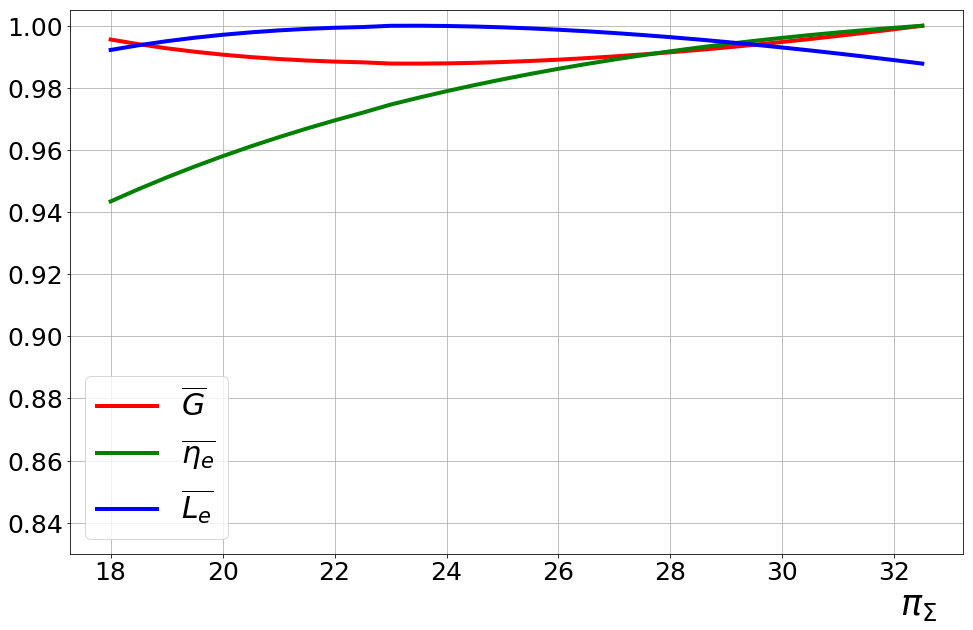

In [94]:
common.plot_nom_characteristic(d3ncs)
plt.show()

### Построим характеристику установки на режимах частичной мощности

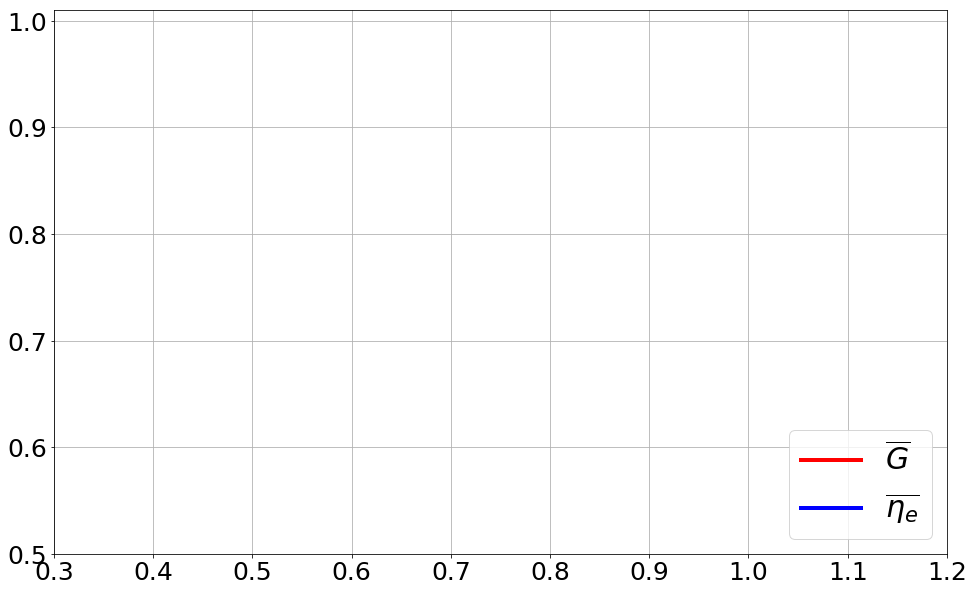

In [95]:
common.plot_common_characteristics(d3nc)
plt.show()

## Сравнительная характеристика всех установок на режимах частичной мощности

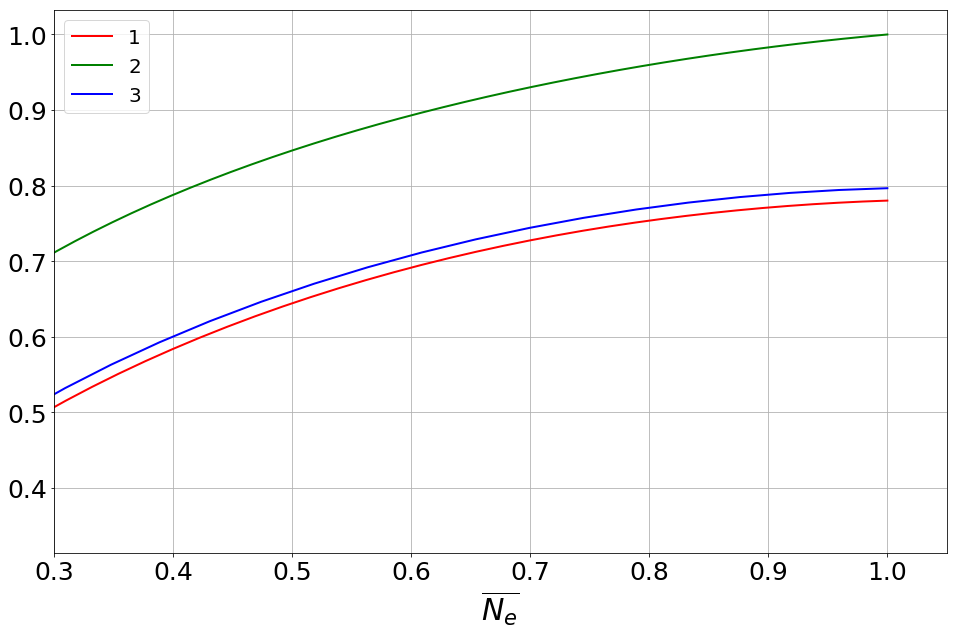

In [96]:
common.plot_rel_comparison([d2n, d2nr, d3n], 'eta')
plt.legend(['1', '2', '3', '4'], loc='best', fontsize=20)
# plt.title('$Сравнение \ КПД \ установок \ на \ режимах \ частичной \ мощности$', fontsize=24)
plt.show()

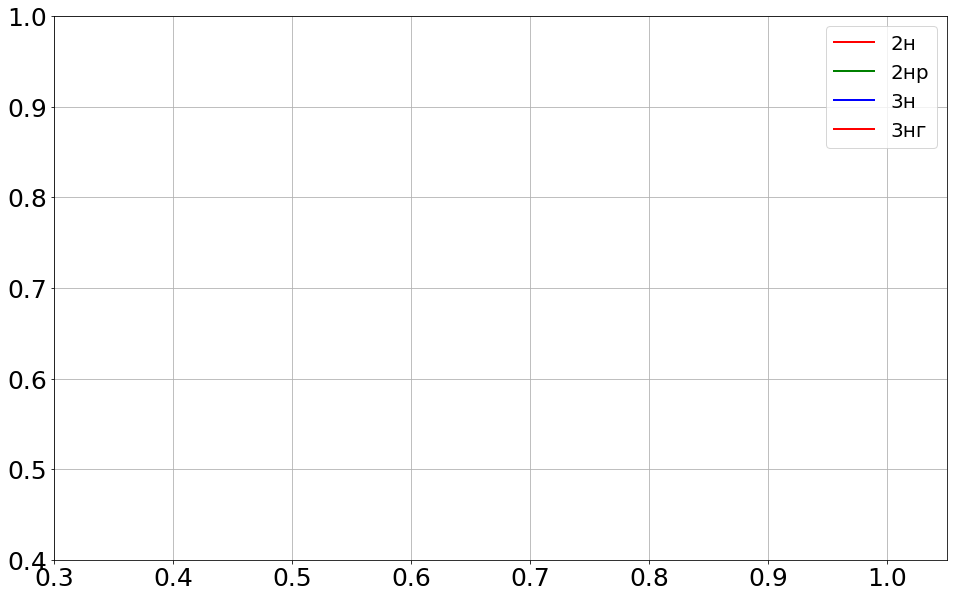

In [97]:
common.plot_comparison([d2n, d2nr, d3n, d3nb], 'mass_rate')
plt.legend(['2н', '2нр', '3н', '3нг'], loc='best', fontsize=20)
# plt.title('$Сравнение \ расходов \ воздуха \ установок \ на \ режимах \ частичной \ мощности$', fontsize=24)
plt.show()

In [98]:
d3nb

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
14,0.193426,0.969119,0.999373,0.999969,26.390839,2.255950,3.381856,3.898688,5.795558,2153.150081,5196.634742,5370.017288,1170
13,0.205787,0.974932,0.999513,0.999983,27.501661,2.335849,3.472404,3.991166,6.408946,2226.802652,5262.313248,5388.974849,1190
12,0.218302,0.980178,0.999629,0.999992,28.649162,2.419419,3.565818,4.083439,7.065714,2300.643977,5326.938071,5411.500532,1210
11,0.230903,0.984824,0.999725,0.999996,29.833012,2.506836,3.662185,4.175273,7.765847,2374.501814,5390.463141,5438.379983,1230
10,0.243503,0.988836,0.999802,0.999999,31.051731,2.598192,3.761646,4.266229,8.507985,2448.113577,5452.886011,5470.367779,1250
9,0.255972,0.992189,0.999863,0.999999,32.300537,2.693320,3.864320,4.355476,9.287884,2521.016594,5514.192438,5508.106644,1270
8,0.268139,0.994868,0.999910,1.000000,33.569931,2.791646,3.970259,4.441693,10.097213,2592.501436,5574.361580,5551.995987,1290
7,0.279782,0.996887,0.999944,1.000000,34.844682,2.892059,4.079437,4.523006,10.922503,2661.594434,5633.391740,5601.996564,1310
6,0.290658,0.998296,0.999968,1.000000,36.103332,2.992824,4.191685,4.597057,11.745281,2727.130324,5691.299288,5657.410628,1330
5,0.300531,0.999185,0.999984,1.000000,37.319211,3.091620,4.306605,4.661288,12.542935,2787.846430,5748.086999,5716.721807,1350


In [99]:
d2n

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,t
39,0.151936,0.999849,0.942482,35.288716,8.754929,1.747215,4.475499,3.148642,1744.974201,8937.536516,1160
38,0.162214,0.999897,0.948904,36.410648,9.072945,1.797161,4.509168,3.509115,1809.174491,9001.954146,1170
37,0.172241,0.999931,0.954807,37.510216,9.387817,1.846907,4.539988,3.884223,1871.468993,9063.319239,1180
36,0.182003,0.999955,0.960217,38.587550,9.699468,1.896471,4.568114,4.273185,1931.961554,9121.842436,1190
35,0.191483,0.999971,0.965158,39.641801,10.007581,1.945829,4.593668,4.674884,1990.695688,9177.658649,1200
34,0.200679,0.999982,0.969657,40.673740,10.312249,1.995017,4.616808,5.088659,2047.775681,9230.969849,1210
33,0.209563,0.999989,0.973733,41.681573,10.612923,2.043967,4.637632,5.512991,2103.182822,9281.827684,1220
32,0.218142,0.999993,0.977411,42.666460,10.909800,2.092720,4.656298,5.947270,2157.018262,9330.421661,1230
31,0.226410,0.999996,0.980716,43.628343,11.202774,2.141269,4.672933,6.390477,2209.322058,9376.863984,1240
30,0.234363,0.999998,0.983671,44.567602,11.491856,2.189619,4.687667,6.841728,2260.146137,9421.276059,1250
